In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf

In [ ]:
train_data = np.loadtxt('train.csv', delimiter=',', skiprows=1)
train_data.shape

(42000, 785)

In [ ]:
height = int(np.sqrt(train_data.shape[1] - 1))# -1 As the first column is the label of the data
width = int(np.sqrt(train_data.shape[1] - 1))
print("Height: {}, Width: {}".format(height, width))

Height: 28, Weight: 28


#1. (b) Display one of each digit

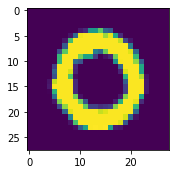

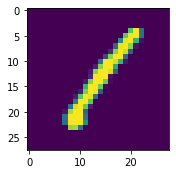

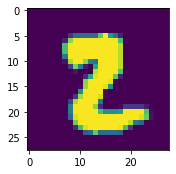

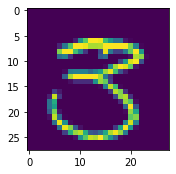

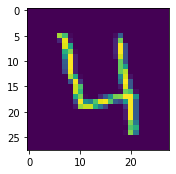

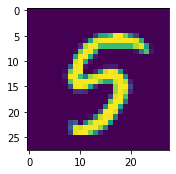

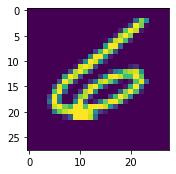

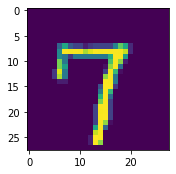

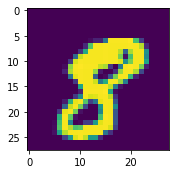

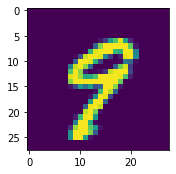

In [ ]:
for label in range(10):
  test = train_data[train_data[:,0] == label]
  display = test[0,1:].reshape(height, width)
  plt.figure(figsize=(30, 30))
  plt.subplot(1, 10, label+1)
  plt.imshow(display)
plt.show()

#1. (c)

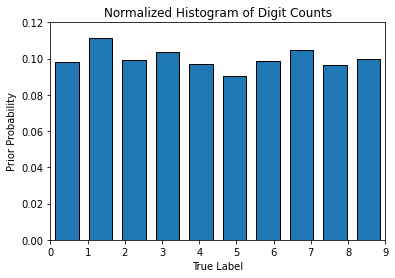

In [ ]:
plt.axis([0, 9, 0, 0.12])
plt.hist(train_data[:,0], edgecolor='black', weights=(np.ones_like(train_data[:, 0]) / train_data.shape[0]), rwidth=0.7)
plt.title("Normalized Histogram of Digit Counts")
plt.xlabel("True Label")
plt.ylabel("Prior Probability")
plt.show()

#1. (d)

In [ ]:
dig_list = []
for digit in range(10):
  dig_list.append(list(train_data[:,0]).index(digit))
print(dig_list)# dig_list stores the indices of each digit within the train_data

[1, 0, 16, 7, 3, 8, 21, 6, 10, 11]


<Figure size 144x144 with 0 Axes>

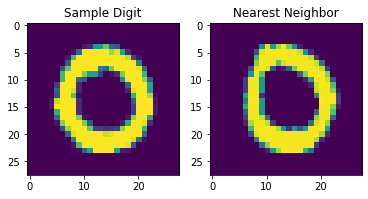

<Figure size 144x144 with 0 Axes>

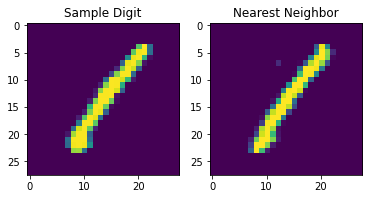

<Figure size 144x144 with 0 Axes>

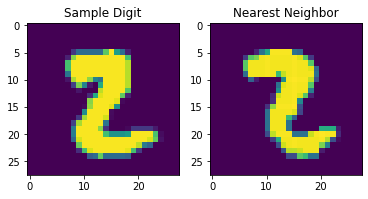

<Figure size 144x144 with 0 Axes>

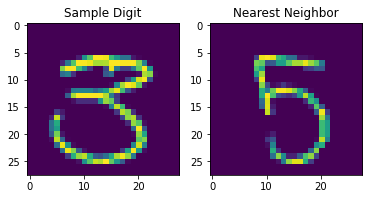

<Figure size 144x144 with 0 Axes>

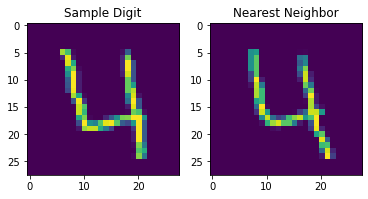

<Figure size 144x144 with 0 Axes>

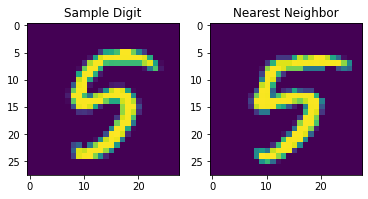

<Figure size 144x144 with 0 Axes>

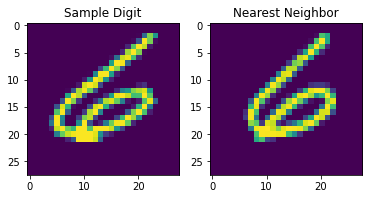

<Figure size 144x144 with 0 Axes>

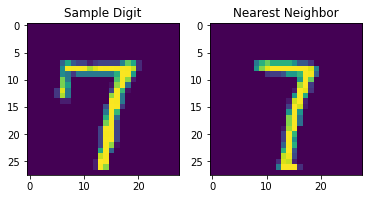

<Figure size 144x144 with 0 Axes>

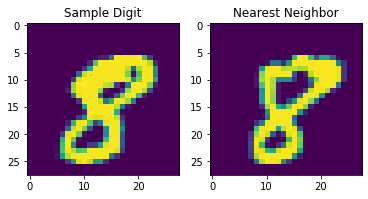

<Figure size 144x144 with 0 Axes>

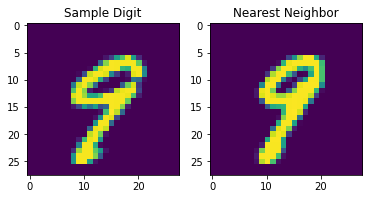

In [ ]:
from math import inf
for i in dig_list:
  digit = train_data[i]
  dist = []
  for j in train_data:
    dist.append(np.linalg.norm(j[1:] - digit[1:]))
  dist[i] = inf
  nearest_neighbor = min(dist)
  ind = dist.index(nearest_neighbor)

  plt.figure(figsize=(2,2))
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(digit[1:].reshape(height, width))
  ax[0].title.set_text('Sample Digit')
  ax[1].imshow(train_data[ind][1:].reshape(height, width))
  ax[1].title.set_text('Nearest Neighbor')

plt.show()

#1. (e)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
dig_zero = train_data[train_data[:,0] == 0][:, 1:]
dig_one = train_data[train_data[:,0] == 1][:, 1:]

In [ ]:
genuine_dist = []
impostor_dist = []
genuine_dist = np.append(euclidean_distances(dig_zero, dig_zero).flatten(), euclidean_distances(dig_one, dig_one).flatten())

impostor_dist = euclidean_distances(dig_one, dig_zero).flatten()

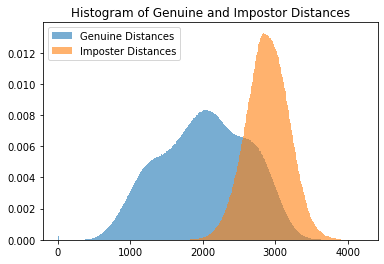

In [ ]:
plt.hist(genuine_dist, weights=(np.ones_like(genuine_dist) / len(genuine_dist)), label='Genuine Distances', bins=300, alpha=0.6)
plt.hist(impostor_dist, weights=(np.ones_like(impostor_dist) / len(impostor_dist)), label='Imposter Distances', bins=300, alpha=0.6)
plt.legend()
plt.title("Histogram of Genuine and Impostor Distances")
plt.show()

#1. (f)

In [ ]:
x_axis = []
y_axis = []
for i in range(1000, 5000, 50):
  x_axis.append((np.sum(genuine_dist < i) / len(genuine_dist)))
  y_axis.append((np.sum(impostor_dist < i) / len(impostor_dist)))

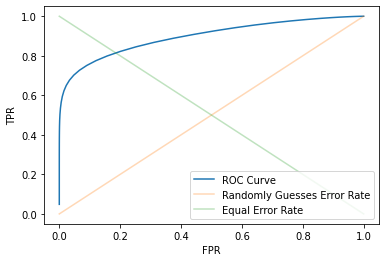

In [ ]:
plt.plot(y_axis, x_axis, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
random_y = [0, 1]
random_x = [0, 1]
plt.plot(random_y, random_x, label="Randomly Guesses Error Rate", alpha=0.3)
equal_y = [1, 0]
equal_x = [0, 1]
plt.plot(equal_y, equal_x, label="Equal Error Rate", alpha=0.3)
plt.legend()
plt.show()

#1. (g)

In [ ]:
def KNN(train, label, data_point, k):

  distance = np.zeros((len(train), 1))
  for i in range(len(train)):
    distance[i] = np.linalg.norm(train[i] - data_point)

  decision_neighbors = []
  for i in range(k):
    min_dist_ind = distance.argmin()
    decision_neighbors.append(min_dist_ind)
    distance[min_dist_ind] = inf
  
  voting = np.zeros(10)
  for i in range(k):
    neighbor_ind = decision_neighbors[i]
    neighbor_label = int(label[neighbor_ind])
    voting[neighbor_label] += 1
  
  return voting.argmax()

#1. (h) & (i)

In [ ]:
from sklearn.model_selection import KFold
import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [ ]:
train = train_data[:, 1:]
label = train_data[:, :1]

kfold = KFold(n_splits=3)

In [ ]:
train.shape

(42000, 784)

NO.1 CV Accuracy is: 96.6%, Time Consumed: 3315.19s


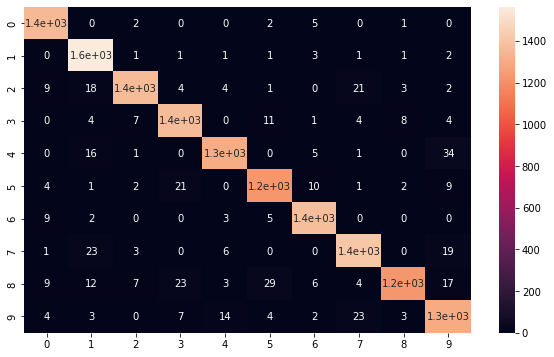


----------------
NO.2 CV Accuracy is: 96.4%, Time Consumed: 3268.08s


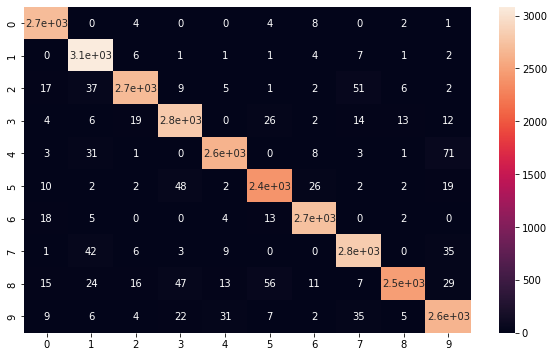


----------------
NO.3 CV Accuracy is: 96.6%, Time Consumed: 3287.70s


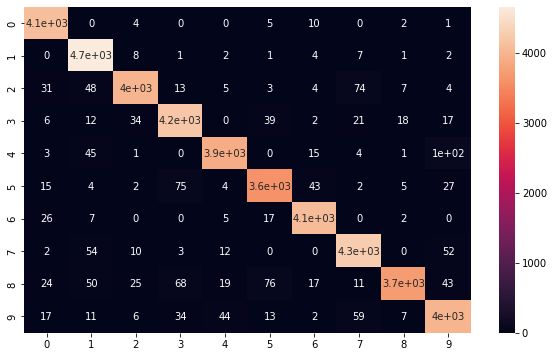


----------------
Average Accuracy is: 96.5%, Total Time Consumed: 9872.53s


In [ ]:
pred = []
true_label = []
start = time.time()
ave_acc = 0
counter = 0
for train_ind, test_ind in kfold.split(train):
  counter += 1

  cv_start = time.time()
  accuracy = 0
  for i in range(len(test_ind)):
    prediction = KNN(train[train_ind], label[train_ind], train[test_ind[i]], k=3)
    if int(prediction) == int(label[test_ind[i]]):
      accuracy += 1

    pred.append(prediction)
    true_label.append(int(label[test_ind[i]]))

  acc = accuracy / len(test_ind)
  ave_acc += acc
  print("NO.{} CV Accuracy is: {:.1f}%, Time Consumed: {:.2f}s".format(counter, 100*acc, time.time()-cv_start))

  confusion = confusion_matrix(true_label, pred)
  data = pd.DataFrame(confusion, index = [i for i in "0123456789"], columns=[i for i in "0123456789"])
  plt.figure(figsize=(10, 6))
  sn.heatmap(data, annot=True)
  plt.show()

  print()
  print("----------------")

print("Average Accuracy is: {:.1f}%, Total Time Consumed: {:.2f}s".format(100*(ave_acc / 3), time.time() - start))

#1. (j)

In [ ]:
test_data = np.loadtxt('test.csv', delimiter=',', skiprows=1)
test_data.shape

(28000, 784)

In [ ]:
test = []

for i in range(len(test_data)):
  prediction = KNN(train, label, test_data[i], k=3)

  test.append((int(i+1), int(prediction)))
np.savetxt("Kaggle.csv", test, delimiter=',')